## Implementation of a Bank Term Deposit Predictive Model


### Problem description:

**To determine if a customer will subscribe to a term deposit or not.**

With the dataset provided, the goal to the project is to implement a machine learning to predict if a customer will subscribe to a term deposit or not. Given a set of characteristics about a customer, this model should be able to detrmine if the customer will or will not subscribe to the term deposit. A labelled dataset is provided and hence making it a supervised machine learning problem. Given that the target value has two possible values, that make it a binary clssification problem.

Although this project is meant to help me gain practical understanding of data analysis, it could be use to  increase the efficiency of a marketing campaign by identifying the factors that have the greatest influence on
the campaign and predicting whether the campaign will be successful to a particular customer of the bank. It can also be used to forecast if a customer will subscribe or not and based on this, better marketing plans are put in place to increase subscription values.

Some related problems include
* wine classification based on quality
* Spam detection based on the email content 
* fraudulent bank transaction detection etc

**Approach**

* Supervised machine learning techniques are adopted in this task because a labeled data set had been provided.
* The goal is to learn or do a mapping between the given explanatory variables and the target variable.
* From the mapping, a relationship between the features and the target variable is established.
* This function is then used to make predcitions of the target variables when given a set of the explanatory variables.
* To improve on the perfomance model, measures are taken to mitigate the effect of 
    * the imbalance in the dataset set and feature selection is also used.
    * The presence out outliers

**Steps**

* Data preprocessing (cleaning and visualization)
* Train an SVM binary classifier.
* Make predictions with the classifier.
* Evaluate the performance of the model.
* Improve the performance of the model




#### Attribute information
* age :		(numeric)
* ob : 		type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
* marital : 	marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* education : 	(categorical: "unknown","secondary","primary","tertiary")
* default: 		has credit in default? (binary: "yes","no")
* balance: 		average yearly balance, in euros (numeric) 
* housing: 		has housing loan? (binary: "yes","no")
* loan: 		has personal loan? (binary: "yes","no")
* contact: 		contact communication type (categorical: "unknown","telephone","cellular") 
* day: 		last contact day of the month (numeric)
* month: 		last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: 	last contact duration, in seconds (numeric)
* campaign: 	number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: 		number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* previous: 	number of contacts performed before this campaign and for this client (numeric)
* poutcome: 	outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

* Class:      has the client subscribed a term deposit? :	(binary: "yes","no")


In [1]:
# import all necessary libraries here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy as sp
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score


### Exploratory Data Analysis.
#### Import the data and look at the structure of the data.

* By using the `df.head(n)`, the first n rows of the dataset are displayed and df.tail(n) displays the last n rows of tha dataset. By default, these functions return the first five rows and the last 5 rows respectively.



In [2]:
# read in the data

bank_df = pd.read_csv("Bank/bank.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198,1,-1.0,0,unknown,no


In [3]:
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
15106,51,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977,3,-1.0,0,unknown,yes
15107,71,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456,2,-1.0,0,unknown,yes
15108,72,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127,5,184.0,3,success,yes
15109,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508,4,-1.0,0,unknown,no
15110,37,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17.0,nov,361,2,188.0,11,other,no


* `df.info()` gives you info about the data type for each column and the number of entries available for each column (you can the number of missing values).

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15111 entries, 0 to 15110
Data columns (total 17 columns):
age           15111 non-null int64
job           15042 non-null object
marital       15099 non-null object
education     15080 non-null object
default       15060 non-null object
balance       15110 non-null float64
housing       15096 non-null object
loan          15111 non-null object
contact       15081 non-null object
day           14988 non-null float64
month         14999 non-null object
duration      15111 non-null int64
campaign      15111 non-null int64
pdays         15091 non-null float64
previous      15111 non-null int64
poutcome      15111 non-null object
subscribed    15111 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 2.0+ MB


From the output, we can tell the 
* the total number of entries: **15111**
* the number of columns: **3+4+10**
* type of data in each column: **3-float, 4-int, 10-object**
* if there is missing data or not in each column.

By doing a few calculations from the output above, one can deduce the number of missing data in each column. However, there the number of missing data in each column can be computed and displayed as follows.

In [5]:
print(bank_df.isnull().sum())
# What percentage of data is missing in each column
((bank_df.isnull().sum()/len(bank_df)))*100

age             0
job            69
marital        12
education      31
default        51
balance         1
housing        15
loan            0
contact        30
day           123
month         112
duration        0
campaign        0
pdays          20
previous        0
poutcome        0
subscribed      0
dtype: int64


age           0.000000
job           0.456621
marital       0.079412
education     0.205149
default       0.337502
balance       0.006618
housing       0.099265
loan          0.000000
contact       0.198531
day           0.813977
month         0.741182
duration      0.000000
campaign      0.000000
pdays         0.132354
previous      0.000000
poutcome      0.000000
subscribed    0.000000
dtype: float64

This last output in the cell above displays the percentage of data missing in each column and it is shown that not up 1% of data is missing in any of the columns. To drop missing data without interferign wiht some of its major characteristics, we have to ensure that the overall percentage of missing data is insignificant. In the followings cells, some calculations are done to determine the overall percentage of missing data

In [7]:
rows_before = bank_df.shape[0]
bank_df.dropna(inplace =True)
rows_after = bank_df.shape[0]

percentage_missing = 100*(rows_before - rows_after)/rows_before
print(f"\nOverall percentage of missing data: {percentage_missing}")


Overall percentage of missing data: 1.932367149758454


Hence dropping missing data reduces the available data just by 1.93237%. 

From the variable description, it was confusing as to whether the `unknown` value presented as one of the values on some columns above was equivalent to a `NaN` value. To check this, the different values in each column are displayed. A list oc columns with continuous data vlues is created to avoid a scenario of lengthy outputs.

In [6]:
none_cats = ['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']
# is unknown == nan?
for col in bank_df.columns.values:
    if col not in none_cats:
        print(f"{col}:{bank_df[col].unique()}")    

job:['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' nan]
marital:['married' 'single' 'divorced' nan]
education:['tertiary' 'secondary' 'unknown' 'primary' nan]
default:['no' 'yes' nan]
housing:['yes' 'no' nan]
loan:['no' 'yes']
contact:['unknown' 'cellular' 'telephone' nan]
month:['may' nan 'jun' 'jul' 'aug' 'sep' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar'
 'apr']
poutcome:['unknown' 'failure' 'other' 'success']
subscribed:['no' 'yes']


From the output, looking at the different unique values in the education column, there is `unknown` and `nan`. This soes same fo rthe contact and other columns. Hence, the conclusion that `unknown` is just another category in these column and does not represent a missing value.

To look at some statistical properties of the data, the `describe()` method is used.

In [11]:
bank_df.describe() # for numerical data only

,age,balance,day,duration,campaign,pdays,previous
count,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000
mean,40.975234,1281.514272,13.336662,268.316756,2.282610,56.259532,0.862676
std,12.383537,3139.364696,6.913320,253.025171,2.156648,117.667974,2.286970
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,31.000000,70.000000,8.000000,114.500000,1.000000,-1.000000,0.000000
50%,38.000000,393.000000,13.000000,195.000000,2.000000,-1.000000,0.000000
75%,49.000000,1328.000000,18.000000,333.000000,3.000000,75.000000,1.000000
max,95.000000,102127.000000,31.000000,3785.000000,43.000000,871.000000,58.000000


From the output, we can see the mean, the std, the min, max etc for the columns with numerical data. Looking at the statistics for the `balance` column, the high value of the `std` suggests the existence of outliers. Also, the difference between the `mean` value and the `max` value is huge. Hence, the possibility of outliers in the dataset. One can go ahead to confirm the existence of outliers by looking at the data distribution where skewed distributions suggest presence of outliers.

If you want to look at some statistical values for the categorical values, `all` is entered for the `include` parameter as can be seen below.

In [13]:
bank_df.describe(include='all') # for all columns including the ones with object data type

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,14819.000000,14819,14819,14819,14819,14819.000000,14819,14819,14819,14819.000000,14819,14819.000000,14819.000000,14819.000000,14819.000000,14819,14819
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,3090,8445,7545,14585,NaN,7836,12364,9856,NaN,5714,NaN,NaN,NaN,NaN,10928,11788
mean,40.975234,NaN,NaN,NaN,NaN,1281.514272,NaN,NaN,NaN,13.336662,NaN,268.316756,2.282610,56.259532,0.862676,NaN,NaN
std,12.383537,NaN,NaN,NaN,NaN,3139.364696,NaN,NaN,NaN,6.913320,NaN,253.025171,2.156648,117.667974,2.286970,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,31.000000,NaN,NaN,NaN,NaN,70.000000,NaN,NaN,NaN,8.000000,NaN,114.500000,1.000000,-1.000000,0.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,393.000000,NaN,NaN,NaN,13.000000,NaN,195.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1328.000000,NaN,NaN,NaN,18.000000,NaN,333.000000,3.000000,75.000000,1.000000,NaN,NaN


**Top** indicates the **mode** of the column

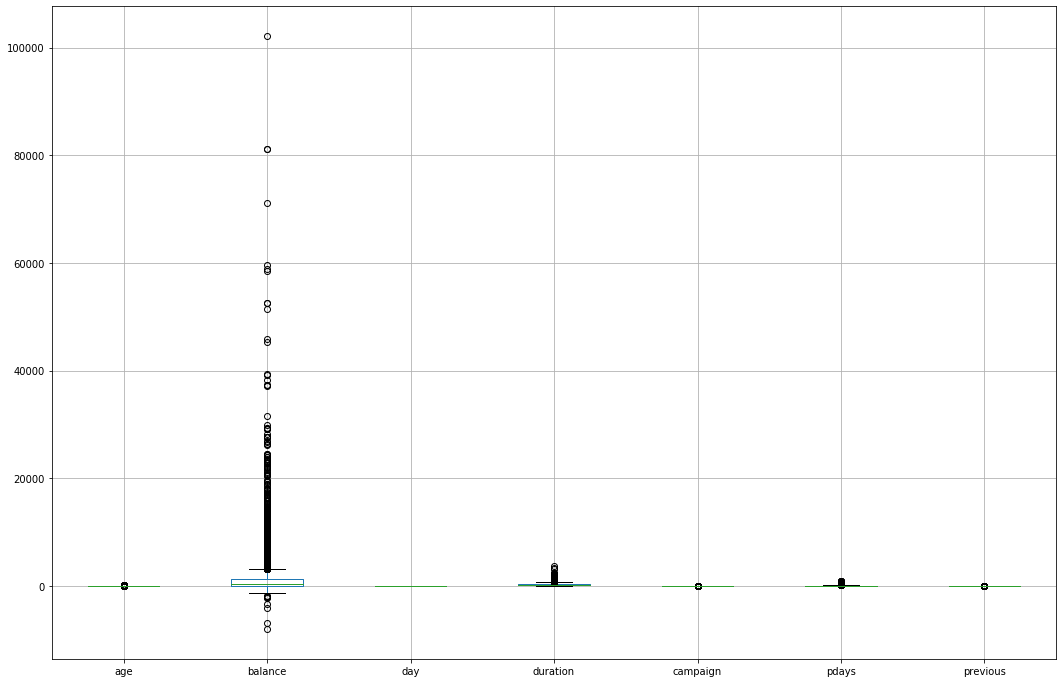

In [14]:
plt.figure(figsize=(18, 12))
bank_df.boxplot()

* Are the variables normally distributed?

Best way to calculate the bins

* [link1](https://www.statisticshowto.com/choose-bin-sizes-statistics/)
* [link2](https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram)

R(n^(1/3))/(3.49σ)

where

* R is the range of data,
* n is the number of samples,
* σ is your standard deviation.

Data in a statistical distribution is said to be skewed when the distrbution weighs more on the left or on the right. This basically implies that, in a skewed distribution, there is more data to the left or right. A normal distribution describes a situation where there is about as many data pointts on the left as there are on the right of the median. Normal distrbutions happen to be rare in real life data. These have some adverse effects on statistical models.

In skewed data, the tail usually is a representation of outliers which have proven to have negative effects on machine learning models. Knowing that outliers have negative effects on model performance, there is need for the data to transformed close enough to a normal distribution.

From [here](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/), it is advisable to use normalization instead of standardization in the case of data that does not follow a normal Gaussion distribution.


In [15]:
def getbins(df, col):
    n = len(df[col])
    r = df[col].max() - df[col].min()
    std = df[col].std()
    bins = int(r*(n**(1/3))/(3.49*std))
    return bins

Median of age is: 38.0


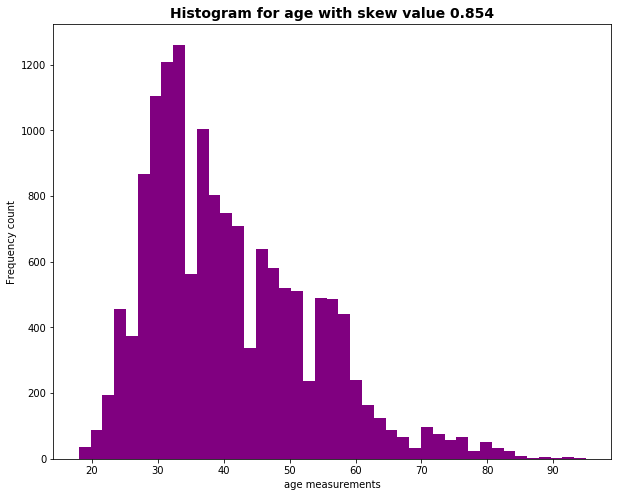

Median of balance is: 393.0


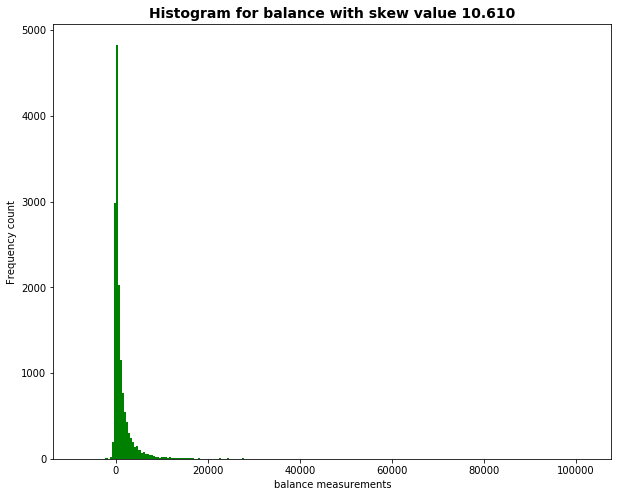

Median of day is: 13.0


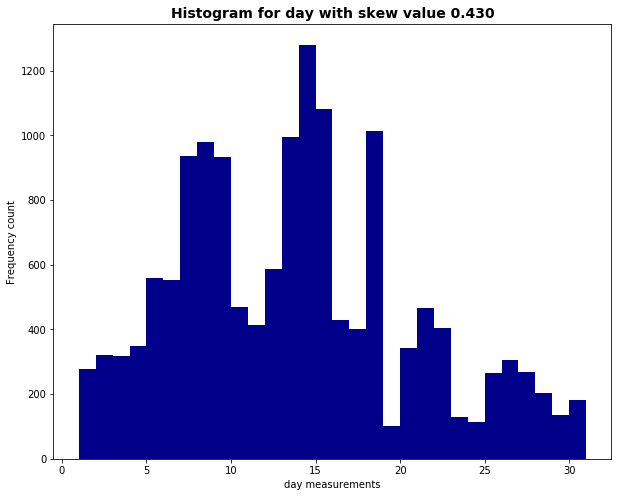

Median of duration is: 195.0


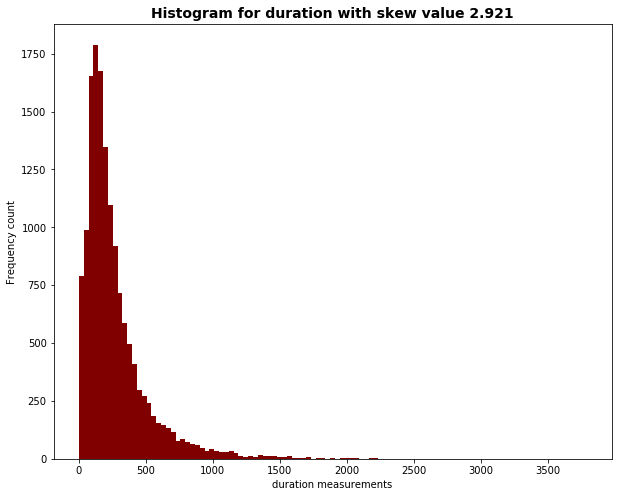

Median of campaign is: 2.0


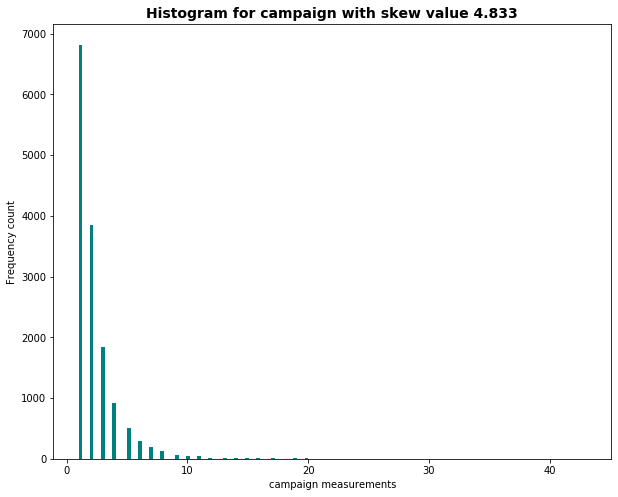

Median of pdays is: -1.0


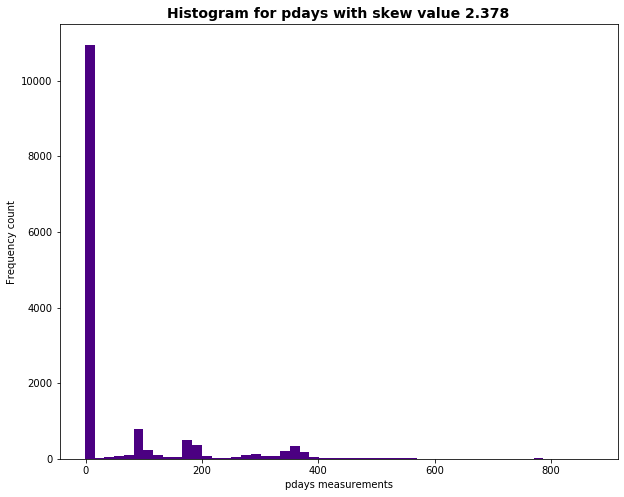

Median of previous is: 0.0


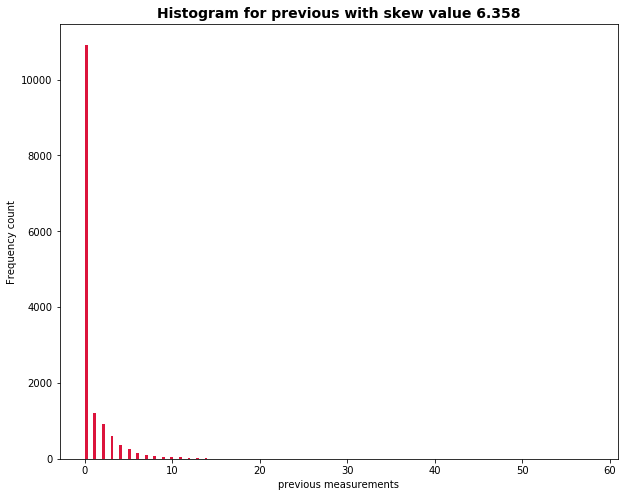

In [16]:
count = 0
for col in none_cats:
    colors = ['purple', 'green', 'darkblue', 'maroon','teal', 'indigo', 'crimson']
    try:
        df = bank_df[col]
        plt.figure(figsize=(10, 8))
        bns = getbins(bank_df, col)
        plt.hist(df.values,bins=bns, color=colors[count] )
        print(f"Median of {col} is: {df.median()}")
        plt.title("Histogram for " + col+ " with skew value {:.3f}".format(skew(df.values)), fontsize=14, fontweight='bold')
        plt.xlabel(col +" measurements")
        plt.ylabel("Frequency count")
        plt.show()
        count = count +1
    except TypeError:
        pass

Most machine learning algorithms if nto all, work best with numerical data. In the available dataset, we have categorical variables. To continue with this, there is need for data transformation to numerical values. There are several approaches to this.
* OneHotEncoding
* LabelEncoding

With [Label Encoding](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/), each category is assigned a unique numerical value with respect to its alphabetical position compared to the other categories. It encodes with values from 0 to *number of categories -1*. The challenge with this is, there is implicit assumption of order among the categories hence giving some degree of importance to some categories.

With [OneHotEncoding](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/), each category is represented as a one-hot vector. It is basically the process of creating dummy variables. Its limitation is based on the fact that it leads to the creation of many new columns hence increasing the dimensionality of the dataset. It also results in a **Dummy Variable Trap**. This basically describes in situation where one dummy variable can be easily predicted from the other dummy variables and hence we are facing the case of **Multicollinearity** which has its negative effects on machine learnimg models such as overfitting. One way to deal with this as proposed in the link above is to drop one of the dummy variable columns.

In the following cells, I have used the `get_dummies()` function for the conversion of categorical data to numerical data for the following reasons.
* it does pretty much the same thing as onehotencoding.
* it had a drop_first argument that I can set to True to deal with the Dummy Variable Trap problem.
* it automatically detects the categorical variables in the dataset and create corresponding dummy variables.

In [17]:
bank_df = pd.get_dummies(bank_df, drop_first=True)

In [18]:
# ensure that the statistics remain the same as earlier
bank_df['subscribed_yes'].value_counts()

0    11788
1     3031
Name: subscribed_yes, dtype: int64

* Differentiate between the dependent(target) and the independent variables 
* In the case, our target variable is the `subscribed_yes`
* Display few rows to ensure that these variables are in accord with our expectations.

In [19]:
y = bank_df['subscribed_yes']
X = bank_df.drop('subscribed_yes', axis = 1)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: subscribed_yes, dtype: uint8

In [36]:
print(X.shape)
X.head()

(14819, 42)


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143.0,5.0,261,1,-1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29.0,5.0,151,1,-1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2.0,5.0,76,1,-1.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506.0,5.0,92,1,-1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1.0,5.0,198,1,-1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In the output above, scroll right to ensure that the `subscribed_yes` variable is not in X.

#### Training and Testing Sets
To proceed with the modelling we need the training and testing datasets. This `sklearn` function `train_test_split` is used to split the data into the training and the testing testing sets. It is good to point it out here that there is no rule of thumb for train-test split ratio. This depends very much on the dataset and on the technique to be adopted. It is adviced to have a larger training set. By having a larger training set, your algorithm gets the chance to have a good understanding of the data. With a better understanding of the data, the model has the tendency of making better predictions.

Here, I have used a 70:30 percent ratio for the training and the testing data respectively.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Feature scaling.
The describes the process of transforming data to fit a particular range. While this is considered to be a very crucial step in data modelling because some algorithms are very sensitive to data values, some algorithms are just invariant with or without feature scaling. The idea behind feature scaling to make it possible for different features to contribute equally to the final result avoiding a situation where features with higher values are considered to have some degree of importance compared to the other features. There are many different approaches to addressing this with the two most common being
* normalization
* standardization

According to [this](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/), **normalization** is preferable when the data does nto follow a Gaussiain distribution. Having plotted the histograms of the different numerical columns, it is clear that none of these columns have a normal or Gaussian distribution. Hence, the reason why I have used the normalization approach.

In [22]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
normalized_X_train = norm.transform(X_train)
# transform testing dataabs
normalized_X_test = norm.transform(X_test)

In [25]:
def train_predict(X_train, X_test, y_train, y_test, model, verbose=False):
    #train the model with the training data set
    model.fit(X_train, y_train)
    #make predictions of the test data
    y_pred = model.predict(X_test)
    #generate the confusion matrix
    conf_mat =  confusion_matrix(y_test, y_pred)
    #calculate the model prediction accuracy
    acc = accuracy_score(y_test, y_pred)
    #generate the class prediction probabilities for every
    #data point in the testing set.
    probs = model.predict_proba(X_test)
    #print the prediction accuracy
    print("Accuracy Score of the SVM classifier: \n", acc)
    #print the confusion matrix
    print("The confusion Matrix: \n", conf_mat)
    #print the recall
    print("Recall = ", recall_score(y_test, y_pred))
    #print the f1_score for the model
    print("F1_score = ", f1_score(y_test, y_pred))
    #plot the heatmap for the confusio matrix.
    #visuals ease comprehension of information and this justifies why 
    #I want a heatmap to be produced each time this functions is used.
    if verbose:    
        plt.figure(figsize=(4,4))
        sb.heatmap(conf_mat, cmap=sb.diverging_palette(20, 220, n=200), square=True, annot=True)
    return X_test, y_test, y_pred, probs

Accuracy Score of the SVM classifier: 
 0.8313090418353576
The confusion Matrix: 
 [[3409  160]
 [ 590  287]]
Recall =  0.3272519954389966
F1_score =  0.43353474320241686


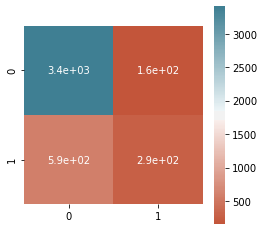

In [26]:
#create an instance of the SVM classifier 
classifier = svm.SVC(probability=True)
xtest, ytest, y_pred, probs = train_predict(normalized_X_train, normalized_X_test, y_train, y_test, classifier, verbose=True)

AUC: 0.88


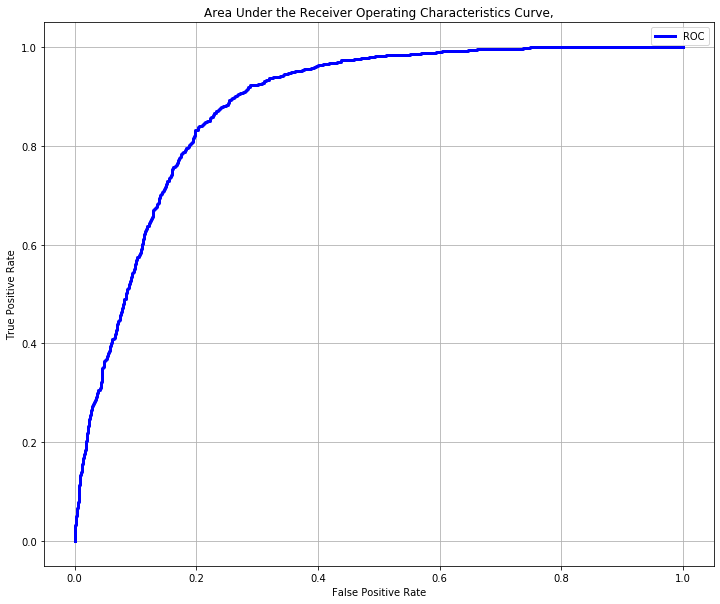

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_cur(probs, y_test):
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.2f' % auc)
    
    fig, ax = plt.subplots(figsize=(12,10))
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, color='blue',LineWidth = 3, label='ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Area Under the Receiver Operating Characteristics Curve,")
    plt.grid()
    plt.legend()
    plt.show()
plot_roc_cur(probs, ytest)

**Observation**
* The accuracy is very good.
* The f1_score is low when compared to the accuracy value.

**Why?**


### Class Imabalance?

So there was a time I wanted to take part in the Outreachy program. I started but the amount of work I had didn't permit me to go further but from the one task that I completed, building a model for wine recommendation, I learned the concept of data imbalance and its effects on a model.

Since then, data imbalance is one of the things I usually check out for in every classification task I embark on.

Data imabalance is a situation where the proportion of data for a single class is way more than in another class. In this problem, only 20.45% of the available data is classified as yes. With the larger portion of the data being no, the probability of always getting a no is higher and this has a huge effect on the model prediction ability.

Text(0.5, 0, 'Value')

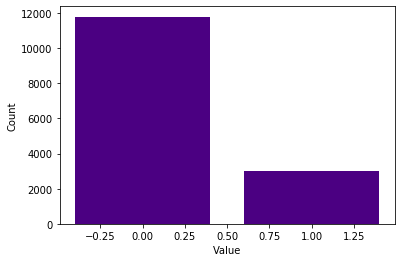

In [29]:
subscribed = bank_df['subscribed_yes'].values.tolist()
val, cnt = np.unique(subscribed, return_counts=True)
prop = cnt / len(subscribed)
plt.bar(val, cnt, color='indigo')

plt.bar(val, prop)
plt.ylabel("Count")
plt.xlabel("Value")

From the bar plot, it is evident that there is imbalance in the data sets, the data entries with target values `yes` suggesting a certain level of imbalance in the dataset. Imbalnce datasets present some challenges in machine learning models

There are several methods used to [handle imbalance data](https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/)
Several methods are used to adjust the data to mitigate the effect of the imbalance
* Oversampling the of the minority data
* Undersampling of the majority data
* generation of synthetic data points for the minority data (Synthetic Minority Over-sampling Technique).
etc

Upsampling increases the likelihood of overfiting
Downsampling leads to information loss
SMOTE technique fight the above limitations by
* Mitigating the problem of overfitting caused by random oversampling since synthetic examples are generated rather than replication of instances.
* Ensuring that no data is loss since there is no data deletion.

This SMOTE has it limitations but it works better than random oversampling or random downsampling. Hence the reason why I employed it for this task.

In [33]:
from imblearn.over_sampling import SMOTE
def SMOTE_resampling(X, y):
    smote = SMOTE(random_state = 42)
    x_resampled, y_resampled = smote.fit_resample(X, y)
    return x_resampled, y_resampled 

In [34]:
x_resampled, y_resampled = SMOTE_resampling(X, y)
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.30, random_state=42)
xtest, ytest, y_pred, probs = train_predict(X_train, X_test, y_train, y_test, classifier)

Accuracy Score of the SVM classifier: 
 0.7194966775060088
The confusion Matrix: 
 [[2508  994]
 [ 990 2581]]
Recall =  0.7227667320078409
F1_score =  0.7223621606493142


The results above show huge improvement inthe model performance. But note that the data use above has noe been scaled?

**Can the performance increase with feature scaling?**

In [35]:
x_resampled, y_resampled = SMOTE_resampling(X, y)
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.30, random_state=42)
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
normalized_X_train = norm.transform(X_train)
# transform testing dataabs
normalized_X_test = norm.transform(X_test)
xtest, ytest, y_pred, probs = train_predict(normalized_X_train, normalized_X_test, y_train, y_test, classifier)

Accuracy Score of the SVM classifier: 
 0.8806729817616288
The confusion Matrix: 
 [[3256  246]
 [ 598 2973]]
Recall =  0.8325399047885746
F1_score =  0.875699558173785


The model accuracy has increase but what has change tremendously is the Recall and the F1_score. 